In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("AmesHousing.csv") # reads a CSV file and assigns the loaded table to the variable df
df.head() # shows first 5 rows of DataFrame

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
df.info() # prints a concise summary: number of rows, column names, non-null counts, and data types. Purpose: find columns with missing values and check whether numeric columns are numeric or accidentally strings.
df.isnull().sum() # returns for each column how many missing entries exist

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [5]:
# Drop columns with too many missing values
df = df.drop(columns=["Alley", "Pool QC", "Misc Feature"])

# Fill numeric with median
num_cols = df.select_dtypes(include=np.number).columns # selects columns whose data type is numeric
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# Fill categorical with mode
cat_cols = df.select_dtypes(include="object").columns # selects columns of type strings/categorical.
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0]) # fill missing categorical values with the mode (most frequent value) for each column.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

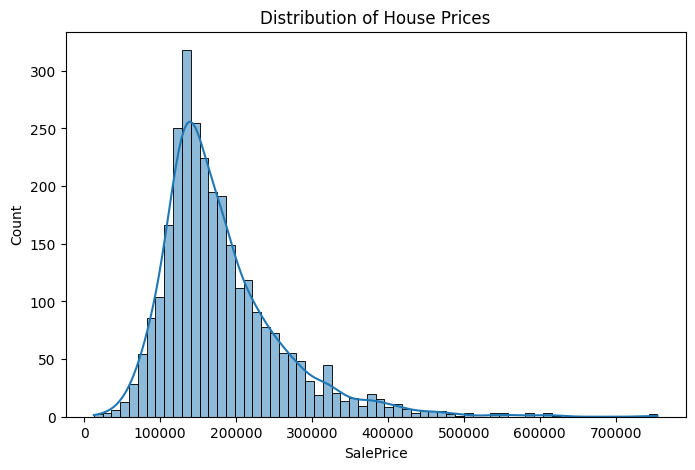

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of House Prices")
plt.show()

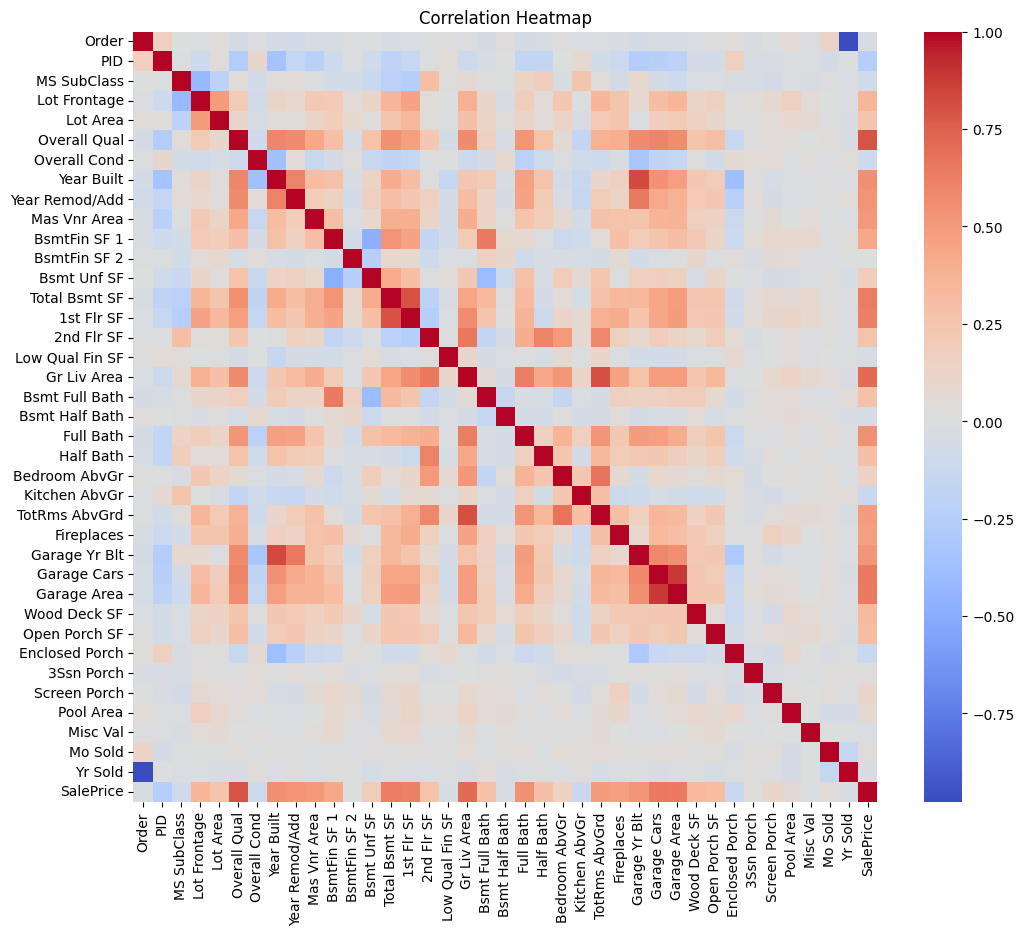

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
corr = df.select_dtypes(include=np.number).corr()["SalePrice"].sort_values(ascending=False)
corr[:10]

,SalePrice
SalePrice,1.000000
Overall Qual,0.799262
Gr Liv Area,0.706780
Garage Cars,0.647877
Garage Area,0.640401
Total Bsmt SF,0.632280
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974


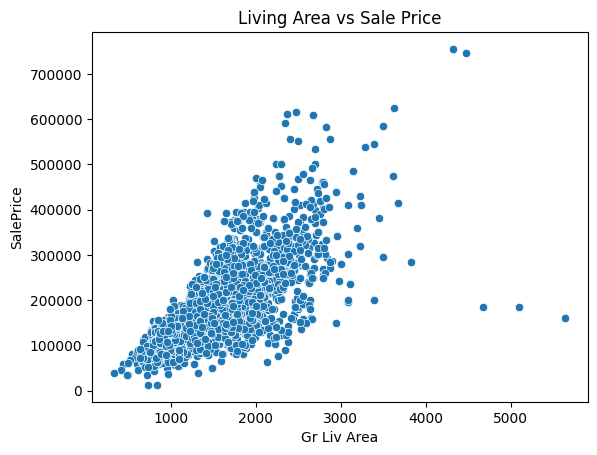

In [17]:
sns.scatterplot(x=df["Gr Liv Area"], y=df["SalePrice"])
plt.title("Living Area vs Sale Price")
plt.show()

In [19]:
df["Total Bath"] = df["Full Bath"] + df["Half Bath"] * 0.5

In [20]:
# Encode categoricals
df = pd.get_dummies(df, drop_first=True)

In [22]:
#Linear Regresion Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
X_train = X_train.fillna(X_train.median())
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
X_test = X_test.fillna(X_test.median())
preds = model.predict(X_test)

In [36]:
mae = mean_absolute_error(Y_test, preds)
rmse = np.sqrt(mean_squared_error(Y_test, preds))

mae, rmse

(16680.03171445632, np.float64(36143.1378514068))